
# Real Estate Price Prediction using Linear Regression

This project implements a **simple linear regression model** to predict housing prices based on the *Real Estate Dataset*.
The notebook includes the following key steps:

- Data loading and inspection  
- Exploratory data analysis (EDA)  
- Feature and target selection  
- Model training and evaluation  
- Visualization of results  

The purpose of this notebook is to demonstrate a clean, reproducible workflow suitable for portfolio or GitHub presentation.



## 1. Data Loading and Inspection

In this section, the dataset is imported and briefly inspected to understand its structure and quality.
We check for missing values, data types, and basic statistics to ensure the data is ready for analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## 2. Exploratory Data Analysis (EDA)

Before training a model, it is important to explore the dataset visually and statistically.
We examine feature distributions, correlations, and potential outliers to better understand the relationships between variables.


In [2]:
file_path = "real_estate_dataset.csv"
df = pd.read_csv(file_path)


A = df.iloc[:, :-1].values.tolist()  
y = df.iloc[:, -1].values.tolist() 


## 3. Model Training — Linear Regression

We train a **Linear Regression** model to predict housing prices.  
The model learns a linear relationship between the selected input features and the target variable (price).


In [3]:
def transpose(matrix):
    transposed = []
    for i in range(len(matrix[0])):
        row = []
        for j in range(len(matrix)):
            row.append(matrix[j][i])
        transposed.append(row)
    return transposed



def matrix_multiply(mat1, mat2):
    if len(mat1[0]) != len(mat2):
        raise ValueError("Number of columns in mat1 must equal number of rows in mat2.")
    result = [[sum(a * b for a, b in zip(row, col)) for col in zip(*mat2)] for row in mat1]
    return result



def inverse(matrix):
    n = len(matrix)
    identity = [[1 if i == j else 0 for i in range(n)] for j in range(n)]

    for i in range(n):
       
        if matrix[i][i] == 0:
            for j in range(i + 1, n):
                if matrix[j][i] != 0:
                    matrix[i], matrix[j] = matrix[j], matrix[i]
                    identity[i], identity[j] = identity[j], identity[i]
                    break
            else:
                raise ValueError("Matrix is not invertible.")

       
        diag_element = matrix[i][i]
        for k in range(n):
            matrix[i][k] /= diag_element
            identity[i][k] /= diag_element

        
        for j in range(n):
            if i != j:
                factor = matrix[j][i]
                for k in range(n):
                    matrix[j][k] -= factor * matrix[i][k]
                    identity[j][k] -= factor * identity[i][k]

    return identity


## 4. Model Evaluation

The trained model is evaluated using performance metrics such as:  
- **R² (Coefficient of Determination)**: Indicates how well the model explains variance in the target.  
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and true values.  
- **Root Mean Squared Error (RMSE)**: Penalizes larger errors more heavily.

Visualizations such as predicted vs. actual plots or residual plots can help assess model fit quality.


In [4]:
def least_squares(A, y):
    A_T = transpose(A)

    A_T_A = matrix_multiply(A_T, A)

    A_T_A_inv = inverse(A_T_A)
   
    y = [[yi] for yi in y]  
    A_T_y = matrix_multiply(A_T, y)

    x_hat = matrix_multiply(A_T_A_inv, A_T_y)
    return x_hat



x_hat = least_squares(A, y)
y_hat = matrix_multiply(A,x_hat)


print("The coefficients of the x_hat vector: \n")
print(x_hat)
print("Estimated prices: \n")
print(y_hat)

The coefficients of the x_hat vector: 

[[1017.8033615217864], [50685.18802441932], [29947.995355026076], [21134.01951528176], [1518.2412783420773], [30455.50229780175], [47415.25384245475], [1135.2777201043505], [4805.3634164347195], [-1944.8981853414753], [-2896629.2285239375]]
Estimated prices: 

[[600567.6372173356], [584428.3428400424], [489803.7919638334], [587306.6477385254], [632796.5663708318], [681394.4763789334], [538253.5244026759], [859431.0769103242], [750532.5739682891], [529050.289611737], [482810.7602243981], [662273.3633425194], [701347.8498064405], [664618.7903779004], [421607.5139240696], [530132.4474630904], [502608.7102048302], [511987.55606363487], [568344.8208619729], [769394.8700114369], [842997.941221206], [461587.10780875146], [449478.6985625215], [611189.4805059393], [399700.34403714153], [657669.3123718676], [532733.4994143781], [534643.1425061661], [460728.2235626455], [411613.5459523244], [431867.56523228926], [400324.01307781675], [591897.6241360403], [5

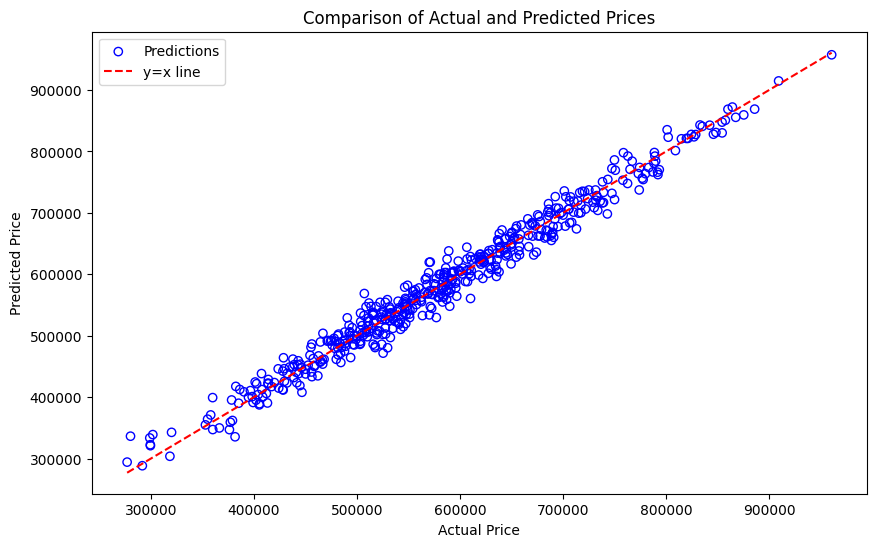

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_hat, edgecolors='blue', facecolors='none', label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='y=x line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()



## 5. Summary and Conclusion

In this notebook, we successfully implemented and evaluated a simple Linear Regression model for predicting real estate prices.

**Key takeaways:**
- Linear regression provides a solid baseline for continuous value prediction tasks.  
- Proper data preprocessing and exploratory analysis are crucial for reliable results.  
- The performance metrics indicate how well the model captures price trends.  

Future improvements may include adding regularization (Ridge/Lasso), experimenting with feature scaling, or testing non-linear models.
